https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html

# Preference is the “preference” value for each data point. If set to None, the median of the input similarities is used. It influences the number of exemplars the algorithm will find. A lower value results in more clusters.

# Damping factor in the range [0.5, 1.0)

# dumping: Also controls the number of clusters. The bigger the dumping less clusters will be. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
%matplotlib notebook

In [2]:
df_pollution = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/pollution_india_2010 (1).csv')
df_pollution_tomodel = df_pollution[['NO2', 'PM10', 'SO2']]
df_pollution_tomodel = df_pollution_tomodel[df_pollution_tomodel != 'Null']
df_pollution_tomodel.dropna(inplace=True)
df_pollution_tomodel.reset_index(drop=True, inplace=True)
print('Shape', df_pollution_tomodel.shape)
df_pollution_tomodel[:10]

Shape (175, 3)


,NO2,PM10,SO2
0,9,39,4
1,11,81,2
2,24,79,5
3,11,62,2
4,9,85,4
5,23,85,5
6,12,65,2
7,23,76,11
8,12,68,4
9,9,37,4


In [3]:
df_pollution_tomodel = df_pollution_tomodel.astype(int)

In [4]:
df_pollution_tomodel.dtypes

NO2     int32
PM10    int32
SO2     int32
dtype: object

In [11]:
ap = AffinityPropagation(damping=0.90,
                        affinity='euclidean',
                         preference= -80000,
                         max_iter=3000)
preds = ap.fit_predict(df_pollution_tomodel)

<IPython.core.display.Javascript object>


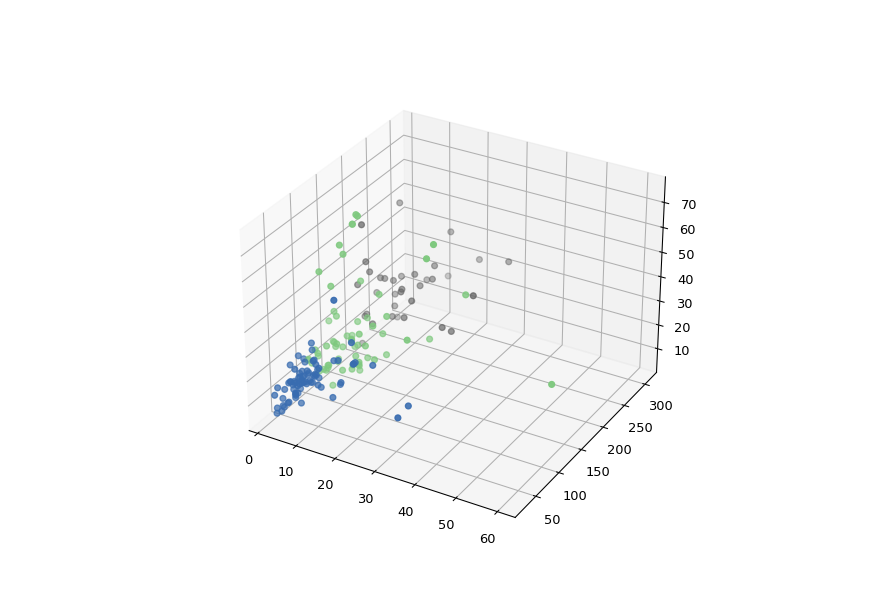

In [12]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_pollution_tomodel['SO2'], df_pollution_tomodel['PM10'],  df_pollution_tomodel['NO2'], c=preds, cmap='Accent')
plt.show()

In [13]:
# Import libraries
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


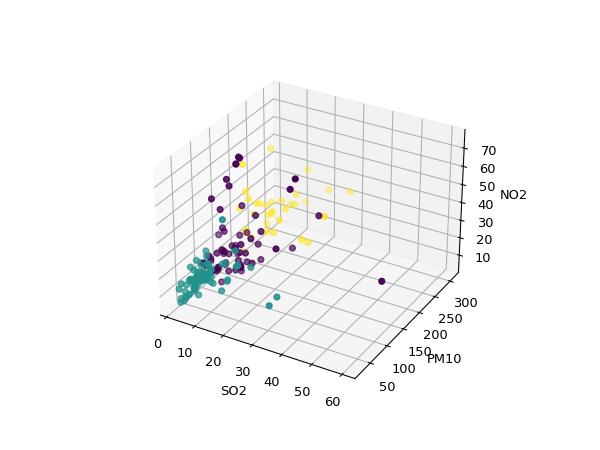

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_pollution_tomodel['SO2']
y = df_pollution_tomodel['PM10']
z =  df_pollution_tomodel['NO2']

ax.set_xlabel('SO2')
ax.set_ylabel('PM10')
ax.set_zlabel('NO2')

ax.scatter(x, y, z, c=preds)

plt.show()

In [15]:
preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0],
      dtype=int64)

In [16]:
unique, counts = np.unique(preds, return_counts=True)

# 3 clusters.

In [17]:
unique

array([0, 1, 2], dtype=int64)

In [18]:
counts

array([64, 77, 34], dtype=int64)

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load and read data frame:
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/wine_dataset.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [3]:
df.shape

(6497, 13)

In [4]:
#Check all features are numeric:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

In [5]:
df = df.drop(['style'], axis=1)
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
#Define X as numpy array:
X = np.array(df)

from sklearn.preprocessing import StandardScaler

#Transform X:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
hyperparams = { "preference": [-90000,-70000,-55000-40000,-30000,-20000,-5000,-2000,2,10,20,]}

In [13]:
af = AffinityPropagation()

In [14]:
def sil_score(data):
    labels = grid_search.labels_(data)
    score = metrics.silhouette_score(data, labels)
    return score

In [15]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=af,
                           param_grid=hyperparams,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring=sil_score)

In [16]:
grid_search.fit(X)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


GridSearchCV(cv=4, estimator=AffinityPropagation(), n_jobs=-1,
             param_grid={'preference': [-90000, -70000, -95000, -30000, -20000,
                                        -5000, -2000, 2, 10, 20]},
             scoring=<function sil_score at 0x0000017193FA4310>, verbose=1)

In [17]:
grid_search.best_params_

{'preference': -90000}

In [19]:
ap = AffinityPropagation(damping=0.90,
                        affinity='euclidean',
                         preference= -90000)
ap.fit(X)

AffinityPropagation(damping=0.9, preference=-90000)

In [20]:
#as you can see there are 9 clusters and each cluster has a center. 
cluster_centers_indices = ap.cluster_centers_indices_
cluster_centers_indices

array([3360], dtype=int64)

In [40]:
X.shape

(6497, 12)

In [21]:
labels = ap.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
unique, counts = np.unique(labels, return_counts=True)

In [23]:
unique

array([0], dtype=int64)

In [24]:
n_clusters_ = len(cluster_centers_indices)
n_clusters_

1

<IPython.core.display.Javascript object>


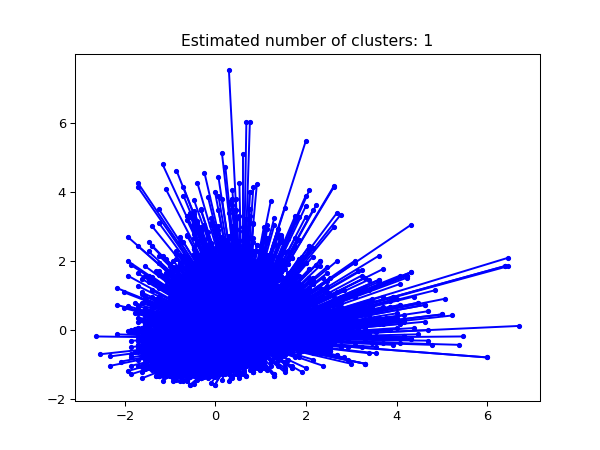

In [25]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [35]:
af = AffinityPropagation(preference=-8000, random_state=0).fit(X)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [36]:
#as you can see there are 2 clusters and each cluster has a center. 
cluster_centers_indices = af.cluster_centers_indices_
cluster_centers_indices

array([1283, 3733], dtype=int64)

In [37]:
labels = af.labels_
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [38]:
unique, counts = np.unique(labels, return_counts=True)

In [39]:
unique

array([0, 1], dtype=int64)

In [40]:
counts

array([1567, 4930], dtype=int64)

In [41]:
n_clusters_ = len(cluster_centers_indices)
n_clusters_

2

<IPython.core.display.Javascript object>


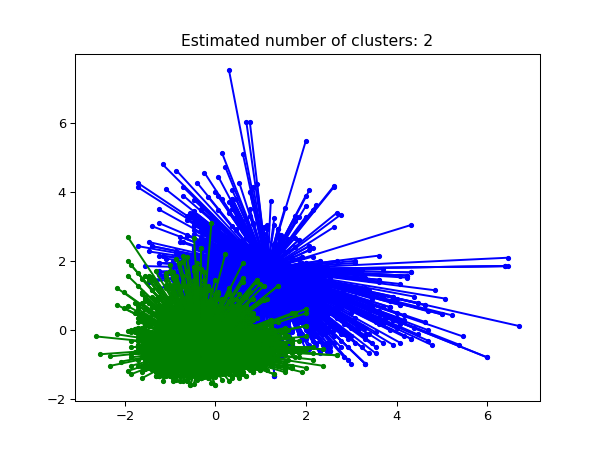

In [42]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# with grid search the best preference creates only 1 cluster. However I created a new model with a different preference value
to show how 2 clusters model looks like. 

In [43]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [44]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, -1]]
X, labels_true = make_blobs(n_samples = 400, centers = centers,
                           cluster_std = 0.5, random_state = 0)

In [49]:
X.shape

(400, 2)

In [64]:
af = AffinityPropagation(preference =-45).fit(X)

In [65]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [66]:
unique, counts = np.unique(labels, return_counts=True)

In [67]:
unique, counts

(array([0, 1, 2], dtype=int64), array([ 99, 102, 199], dtype=int64))

In [148]:
# Compute Affinity Propagation
af = AffinityPropagation(preference =-45).fit(X)

In [149]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [150]:
cluster_centers_indices

array([ 42, 262, 316], dtype=int64)

In [68]:
n_clusters_ = len(cluster_centers_indices)
n_clusters_ 

3

<IPython.core.display.Javascript object>


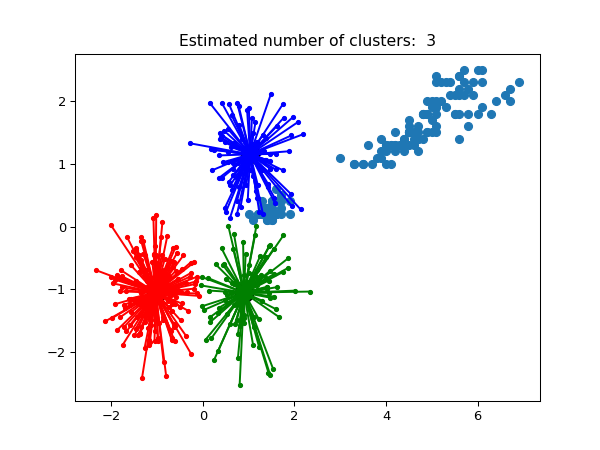

In [69]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt #visualize data

#import iris from sklearn datasets
from sklearn import datasets 
iris = datasets.load_iris()
data = iris.data[:, [2,3]]
data.shape

(150, 2)

In [73]:
#dumping: Also controls the number of clusters. The bigger the dumping less clusters will be. 
#model 
model = AffinityPropagation(damping=0.96)

In [74]:
#fit the model
model.fit(data)

AffinityPropagation(damping=0.96)

In [75]:
#prediction
prediction = model.predict(data)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [76]:
cluster_centers_indices = model.cluster_centers_indices_

In [77]:
#three clusters. 
cluster_centers_indices

array([ 19,  65, 124], dtype=int64)

In [78]:
#unique clusters
np.unique(prediction)

array([0, 1, 2], dtype=int64)

In [79]:
first_data = data[:,0].tolist()

In [80]:
second_data = data[:,1].tolist()

In [82]:
zipped = list(zip(first_data,second_data))
df = pd.DataFrame(zipped, columns=['data_1', 'data_2'])

In [83]:
df.head()

,data_1,data_2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


<IPython.core.display.Javascript object>


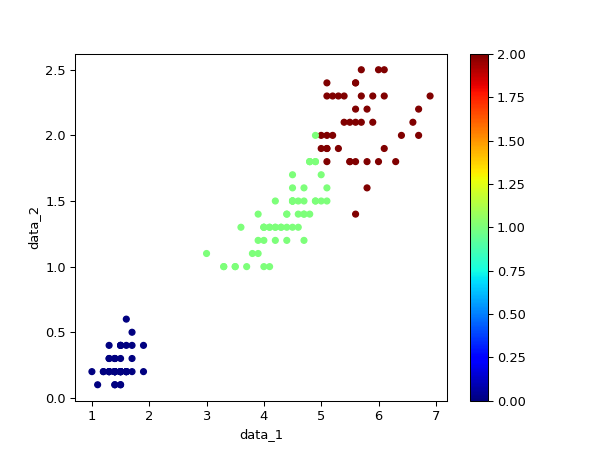

<AxesSubplot:xlabel='data_1', ylabel='data_2'>

In [84]:
df.plot.scatter(x = 'data_1', y = 'data_2',c=prediction,cmap='jet')

In [87]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Knowing the labels, the model gives a good prediction of labels, 3 clusters, with that parameters. Let's corroborate this with the silhouette_score

In [88]:
#silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X=data,labels=prediction)
score

0.6613248299120239

In [89]:
#try different dumping values and check the scores. 
damping_list = np.arange(80,97)/100
damping_list

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96])

In [90]:
sil_score = []
for i in damping_list:
    model = AffinityPropagation(damping = i)
    model.fit(data)
    prediction = model.predict(data)
    score = silhouette_score(X=data,labels=prediction)
    sil_score.append(score)

print(sil_score)

[0.572858149775547, 0.566896698865006, 0.572858149775547, 0.572858149775547, 0.566896698865006, 0.566896698865006, 0.572858149775547, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6613248299120239]


In [91]:
max(sil_score)

0.6613248299120239

# As you can wee the maximum score is 0.6613248299120239, that's 3 clusters. 

# Another example: 

In [92]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

In [93]:
# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

In [94]:
training_data

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

In [96]:
hyperparams = { "damping": [0.5,0.6,0.7,0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96,0.98,0.99]}

In [100]:
af = AffinityPropagation()

In [98]:
def sil_score(data):
    labels = grid_search.labels_(data)
    score = metrics.silhouette_score(data, labels)
    return score

In [99]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=af,
                           param_grid=hyperparams,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring=sil_score)

In [101]:
# train the model
model = grid_search .fit(training_data)

Fitting 4 folds for each of 22 candidates, totalling 88 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


In [102]:
training_data.shape

(1000, 2)

In [103]:
model.best_params_

{'damping': 0.5}

In [104]:
# assign each data point to a cluster
result = model.predict(training_data)

In [105]:
# get all of the unique clusters
clusters = unique(result)
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [241]:
# define the model
model = AffinityPropagation(damping=0.7)

In [242]:
# train the model
model.fit(training_data)

AffinityPropagation(damping=0.7)

In [243]:
# assign each data point to a cluster
result = model.predict(training_data)

In [244]:
# get all of the unique clusters
clusters = unique(result)

In [245]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [106]:
# define the model
model_2 = AffinityPropagation(damping=0.9)

In [107]:
# train the model
model_2.fit(training_data)

AffinityPropagation(damping=0.9)

In [108]:
# assign each data point to a cluster
result2 = model_2.predict(training_data)

In [109]:
# get all of the unique clusters
clusters = unique(result2)

In [110]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [111]:
training_data[:,0]

array([ 1.22515974e+00,  1.01630365e+00,  3.35340043e-01,  1.78634822e+00,
        1.01675094e+00, -1.51405201e+00,  8.43649746e-01,  6.57993748e-01,
        1.24395165e+00,  1.34096685e+00, -1.45164372e+00, -9.15810425e-01,
       -9.38879042e-01, -1.52513606e+00, -1.79530107e-01, -1.47292029e+00,
       -1.67012665e+00, -6.45967634e-01, -8.58613959e-01, -1.00423857e+00,
       -1.06409429e+00,  1.08223229e+00,  8.95745872e-01, -8.06132220e-01,
        1.42955364e+00, -2.18552130e-01,  9.46749323e-01, -1.16865190e+00,
        8.60058582e-01,  7.03752684e-01,  3.35372539e-01,  3.79152132e-01,
        8.38278760e-01,  3.60672003e-01, -1.51502915e+00, -1.72568875e+00,
       -2.48760058e+00, -1.06294327e+00, -1.66132989e+00, -6.35648864e-02,
       -1.86028379e+00, -7.43492653e-01, -8.25655381e-01, -2.20640545e-01,
        6.33892849e-01,  1.05108640e+00, -1.54261421e+00,  1.10227624e+00,
       -1.88862822e+00, -9.94313003e-01,  1.62804377e+00, -5.11039286e-01,
        1.04503029e+00, -

In [112]:
first_data = training_data[:,0].tolist()

In [113]:
second_data = training_data[:,1].tolist()

In [114]:
zipped = list(zip(first_data,second_data))
df = pd.DataFrame(zipped, columns=['data_1', 'data_2'])
df

,data_1,data_2
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569
...,...,...
995,0.929594,-0.743331
996,-0.338431,-0.343315
997,1.542708,-0.055665
998,0.816646,-1.250919


<IPython.core.display.Javascript object>


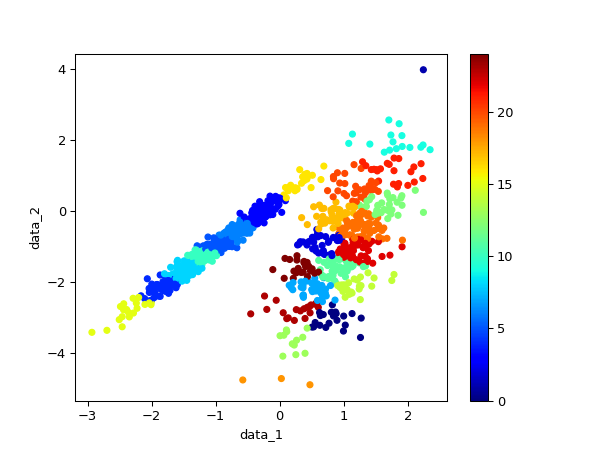

<AxesSubplot:xlabel='data_1', ylabel='data_2'>

In [115]:
df.plot.scatter(x = 'data_1', y = 'data_2',c=result,cmap='jet')

# Based ONLY on the dumping parameter the optimal value using grid search is 0.5, the default value. However if we change the value, still get the same number of clusters: 25.

In [136]:
af = AffinityPropagation(preference=-10.5, random_state=0).fit(training_data)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [137]:
# assign each data point to a cluster
result = af.predict(training_data)

In [138]:
# get all of the unique clusters
clusters = unique(result)
clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [154]:
af = AffinityPropagation(preference=-10.5,random_state=0).fit(training_data)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [155]:
# assign each data point to a cluster
result = af.predict(training_data)

In [156]:
# get all of the unique clusters
clusters = unique(result)
clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [157]:
first_data = training_data[:,0].tolist()
second_data = training_data[:,1].tolist()

In [158]:
zipped = list(zip(first_data,second_data))
df = pd.DataFrame(zipped, columns=['data_1', 'data_2'])
df

,data_1,data_2
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569
...,...,...
995,0.929594,-0.743331
996,-0.338431,-0.343315
997,1.542708,-0.055665
998,0.816646,-1.250919


<IPython.core.display.Javascript object>


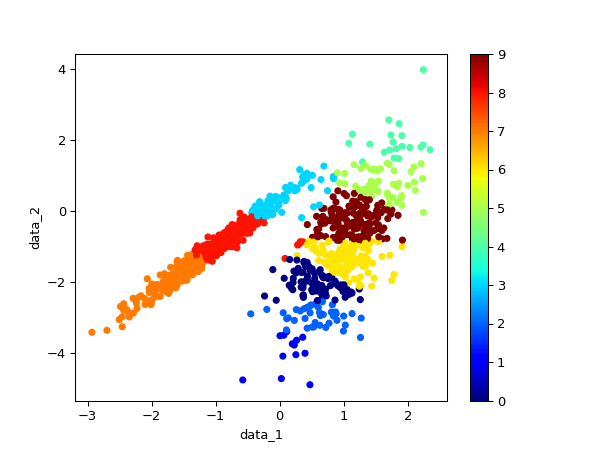

<AxesSubplot:xlabel='data_1', ylabel='data_2'>

In [159]:
df.plot.scatter(x = 'data_1', y = 'data_2',c=result,cmap='jet')

In [198]:
from sklearn.mixture import GaussianMixture

In [199]:
training_data.shape

(1000, 2)

# Let's try  GaussianMixture Model since I see a elliptical shape in the dataset with 2 clusters: 

In [200]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(training_data)
prediction_gmm = gmm.predict(training_data)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [201]:
prediction_gmm.shape

(1000,)

In [202]:
# get all of the unique clusters
clusters = unique(prediction_gmm )
clusters

array([0, 1], dtype=int64)

<IPython.core.display.Javascript object>


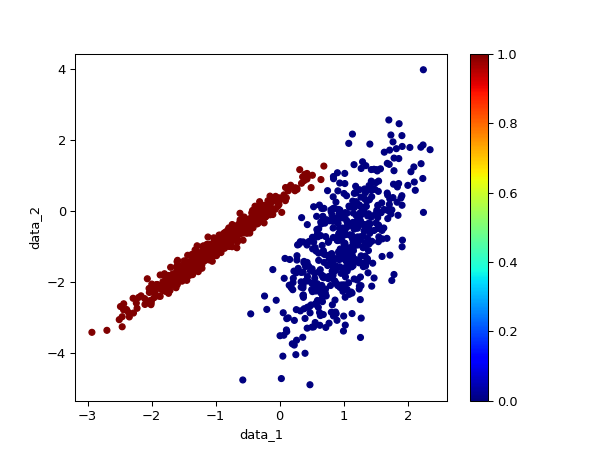

<AxesSubplot:xlabel='data_1', ylabel='data_2'>

In [203]:
df.plot.scatter(x = 'data_1', y = 'data_2',c=prediction_gmm,cmap='jet')

# As I expected GMM separates perfectly the two clusters with the elliptical shape. Clearly it is a better option for this dataset than Affinity Propagation. 

In [259]:
https://www.kaggle.com/code/azminetoushikwasi/different-clustering-techniques-and-algorithms

IndexError: index 2 is out of bounds for axis 1 with size 2

In [193]:
import pandas as pd
import numpy as np

# For generating some data
from sklearn.datasets import make_blobs

from matplotlib import pyplot as plt

from sklearn.cluster import AffinityPropagation

from sklearn import metrics

In [204]:
W, z = make_blobs(n_samples=350, centers=6, cluster_std=0.60)

In [205]:
W.shape, z.shape

((350, 2), (350,))

<IPython.core.display.Javascript object>


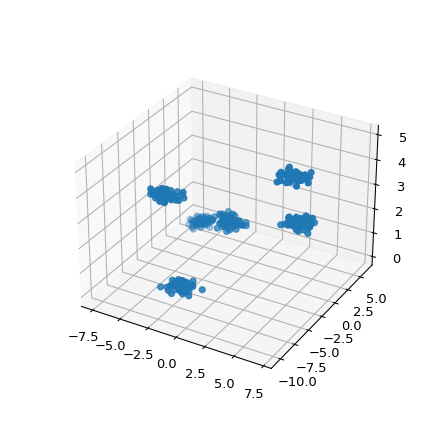

In [206]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection="3d")
ax.scatter3D(W[:, 0],W[:, 1],z, cmap='jet')
plt.show()

In [207]:
afprop  = AffinityPropagation(preference=-50)

afprop.fit(W)

labels = afprop.predict(W)

In [208]:
first_data = W[:,0].tolist()
second_data = W[:,1].tolist()

In [209]:
zipped = list(zip(first_data,second_data))
df_2 = pd.DataFrame(zipped, columns=['data_1', 'data_2'])
df_2

,data_1,data_2
0,6.425387,-2.955771
1,-2.470732,-7.292332
2,-3.342412,-7.256915
3,-6.732813,4.685967
4,-2.608352,-8.422220
...,...,...
345,-6.620263,4.610750
346,5.733021,-1.865416
347,5.698999,-1.599403
348,4.732710,-1.706087


<IPython.core.display.Javascript object>


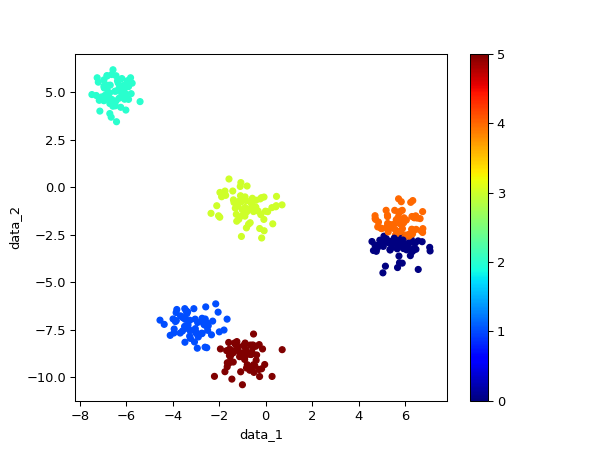

<AxesSubplot:xlabel='data_1', ylabel='data_2'>

In [210]:
df_2.plot.scatter(x = 'data_1', y = 'data_2',c=labels,cmap='jet')

# I see here a spherical shape with 4 clusters so here K-means could be an alternative option: 

In [211]:
from sklearn.cluster import KMeans

In [212]:
kmeans = KMeans(n_clusters=4, random_state=0) 

In [214]:
kmeans.fit(W)

labels_kmeans = kmeans.predict(W)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<IPython.core.display.Javascript object>


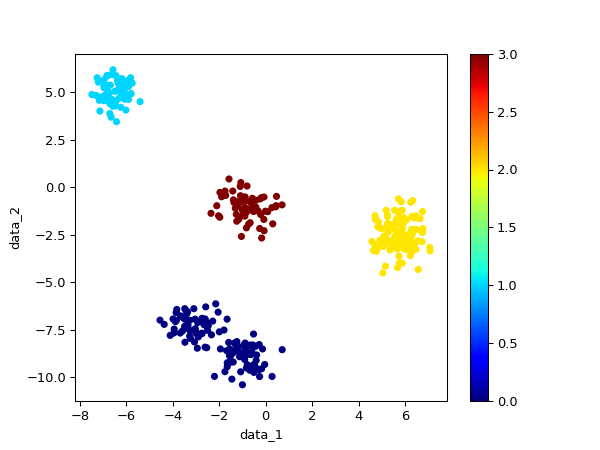

<AxesSubplot:xlabel='data_1', ylabel='data_2'>

In [215]:
df_2.plot.scatter(x = 'data_1', y = 'data_2',c=labels_kmeans ,cmap='jet')

# K-Means gives better results separating perfectly the four spherical clusters. 

In [216]:
cluster_centers_indices = afprop.cluster_centers_indices_
cluster_centers_indices

array([ 43,  56,  80, 218, 285, 341], dtype=int64)

In [217]:
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 6


In [11]:
#6 clusters 2 features. 
afprop.cluster_centers_

array([[-9.57848105, -1.3594526 ],
       [-0.90909571,  7.2866104 ],
       [ 3.01132497, -6.12518428],
       [ 5.15239565,  5.2467971 ],
       [ 2.83184594, -8.53186986],
       [-1.50375997, -5.07480959]])

Last but not least some performance metrics to AF model: 

In [218]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(z, labels))
print("Completeness: %0.3f" % metrics.completeness_score(z, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(z, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(z, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(z, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(W, labels, metric='sqeuclidean'))

Estimated number of clusters: 6
Homogeneity: 0.742
Completeness: 1.000
V-measure: 0.852
Adjusted Rand Index: 0.682
Adjusted Mutual Information: 0.850
Silhouette Coefficient: 0.943
